<a href="https://colab.research.google.com/github/Monsoon94/study/blob/main/%EC%9D%B4%EC%BB%A4%EB%A8%B8%EC%8A%A4_%EA%B3%A0%EA%B0%9D_%EC%84%B8%EB%B6%84%ED%99%94_%EB%B6%84%EC%84%9D_%EC%95%84%EC%9D%B4%EB%94%94%EC%96%B4_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이커머스 고객 세분화 분석 아이디어 경진대회 #

- 주제 : 이커머스 환경에서 발생한 데이터를 통해 고객 세분화 기법을 사용하여 솔루션 제시

- 사이트 링크 : https://dacon.io/competitions/official/236222/overview/description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import datetime as dt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Customer_info.csv to Customer_info.csv
Saving Discount_info.csv to Discount_info.csv
Saving Marketing_info.csv to Marketing_info.csv
Saving Onlinesales_info.csv to Onlinesales_info.csv
Saving Tax_info.csv to Tax_info.csv


In [8]:
import io
import pandas as pd

customer = pd.read_csv(io.StringIO(uploaded['Customer_info.csv'].decode('utf-8')))
discount = pd.read_csv(io.StringIO(uploaded['Discount_info.csv'].decode('utf-8')))
market = pd.read_csv(io.StringIO(uploaded['Marketing_info.csv'].decode('utf-8')))
online = pd.read_csv(io.StringIO(uploaded['Onlinesales_info.csv'].decode('utf-8')))
tax = pd.read_csv(io.StringIO(uploaded['Tax_info.csv'].decode('utf-8')))


In [19]:
for df in (customer, discount, market, online, tax):
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int

In [22]:
customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [28]:
customer

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


from matplotlib import pyplot as plt
customer['가입기간'].plot(kind='hist', bins=20, title='가입기간')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
customer.groupby('성별').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
customer.groupby('고객지역').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
customer['가입기간'].plot(kind='line', figsize=(8, 4), title='가입기간')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['고객지역'].value_counts()
    for x_label, grp in customer.groupby('성별')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('성별')
_ = plt.ylabel('고객지역')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(customer['성별'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(customer, x='가입기간', y='성별', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(customer['고객지역'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(customer, x='가입기간', y='고객지역', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

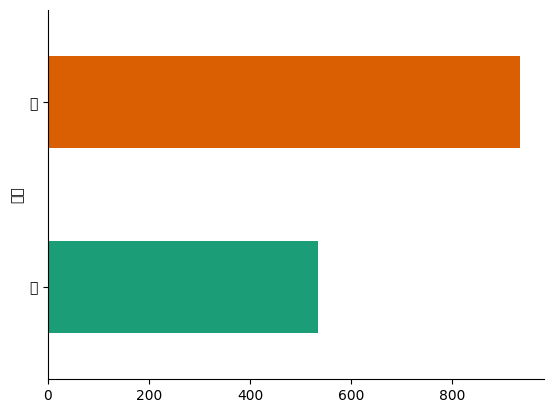

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
customer.groupby('성별').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)